### What is data augmentation?
Ans. Deep learning models rely on large volumes of diverse data to develop accurate predictions in various contexts. Data augmentation supplements the creation of data variations that can help a model improve the accuracy of its predictions.
### How does data augmentation help?
Ans. 
- **Improves accuracy**: Data augmentation helps models learn more robust features from larger and more diverse datasets. 
- **Prevents overfitting**: Data augmentation helps prevent overfitting by providing the model with more data to learn from. 
- **Improves generalization**: Data augmentation improves a model's performance on unseen data. 
- **Expands limited datasets**: Data augmentation helps expand limited datasets to take advantage of the capabilities of big data. 

### How is data augmentation done? 
Ans. 
1. **Geometric transformations**: Randomly flipping, cropping, scaling, or rotating images
2. **Color space transformations**: Changing RGB colors or intensifying colors
3. **Kernel filters**: Sharpening or blurring images
4. **Noise injection**: Adding random noise to images to simulate real-world noise

### When is data augmentation useful?
Ans. Data augmentation is especially useful when dealing with overfitting, class imbalance, or limited data. 

In [1]:
from platform import python_version 
print(python_version()) 

3.11.10


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.preprocessing import image

2025-03-06 01:00:16.899344: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-06 01:00:19.763928: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
from skimage import io
import matplotlib.pyplot as plt
import cv2

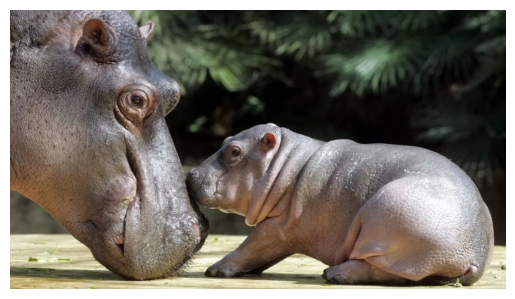

In [19]:
img = io.imread('https://ichef.bbci.co.uk/news/1024/cpsprodpb/F76F/production/_101934336_hi001487062.jpg.webp')
plt.imshow(img)
plt.axis('off')

plt.show()

In [20]:
img.shape

(576, 1024, 3)

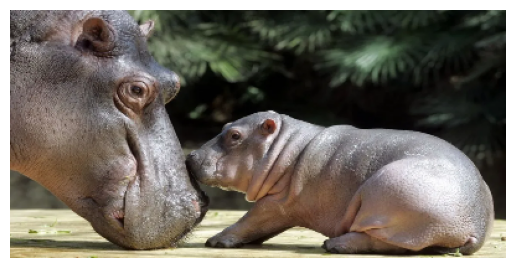

In [18]:
img = cv2.resize(img, (400, 200))
plt.imshow(img)
plt.axis('off')
plt.show()

In [42]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [43]:
input_batch = img.reshape(1, 576, 1024, 3)

In [44]:
i = 0
for output in datagen.flow(input_batch, batch_size=1, save_to_dir='new'):
    i+=1
    if i == 10:
        break

Or

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage import io

def download_image(url):
    return io.imread(url)

def augment_images(image, num_augmented):
    datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    
    image = image.reshape((1,) + image.shape)  # Reshape for batch processing
    augmented_images = [datagen.flow(image, batch_size=1).next()[0] for _ in range(num_augmented)]
    
    return augmented_images

def plot_images(original, augmented_images):
    num_images = len(augmented_images) + 1
    fig, axes = plt.subplots(1, num_images, figsize=(5 * num_images, 5))
    
    axes[0].imshow(original / 255.0)
    axes[0].set_title("Original Image")
    axes[0].axis("off")
    
    for i, img in enumerate(augmented_images):
        axes[i + 1].imshow(img)
        axes[i + 1].set_title(f"Augmented {i + 1}")
        axes[i + 1].axis("off")
    
    plt.show()

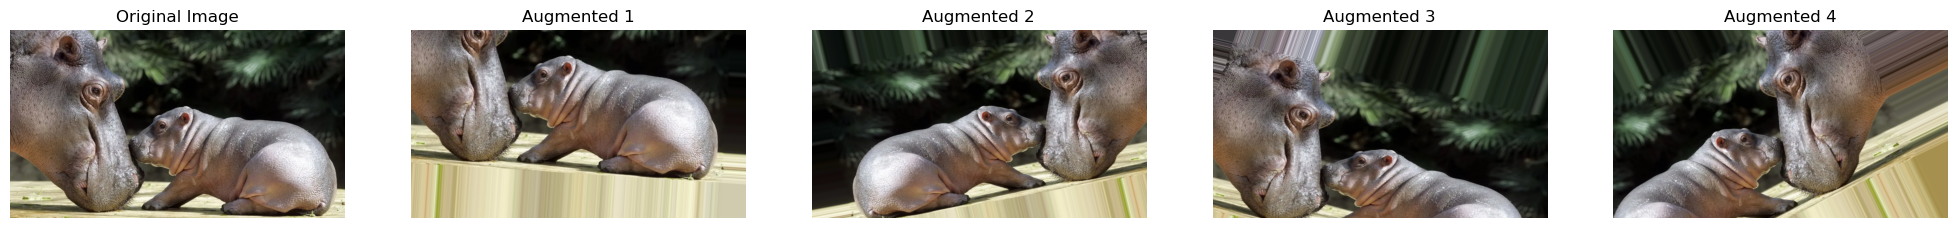

In [54]:
if __name__ == "__main__":
    image_url = input("Enter image URL: ")
    num_augmented = int(input("Enter number of augmented images: "))
    
    original_image = download_image(image_url)
    augmented_images = augment_images(original_image, num_augmented)
    
    plot_images(original_image, augmented_images)